In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import scipy.stats as stats

In [2]:
## Import Ergast API csv's

circuits = pd.read_csv("Datasets/circuits.csv")
constructor_results = pd.read_csv("Datasets/constructor_results.csv")
constructor_standings = pd.read_csv("Datasets/constructor_standings.csv")
constructors = pd.read_csv("Datasets/constructors.csv")
driver_standings = pd.read_csv("Datasets/driver_standings.csv")
drivers = pd.read_csv("Datasets/drivers.csv")
lap_times = pd.read_csv("Datasets/lap_times.csv")
pit_stops = pd.read_csv("Datasets/pit_stops.csv")
qualifying = pd.read_csv("Datasets/qualifying.csv")
races = pd.read_csv("Datasets/races.csv")
results = pd.read_csv("Datasets/results.csv")
seasons = pd.read_csv("Datasets/seasons.csv")
status = pd.read_csv("Datasets/status.csv")
weather = pd.read_csv("Datasets/weather.csv")

In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
## Joining datasets
driver_results = pd.merge(results,drivers, how='left',on='driverId')
driver_results_races = pd.merge(driver_results,races, how='left', on='raceId')
driver_results_races_circuits = pd.merge(driver_results_races,circuits, how='left', on='circuitId')
driver_results_races_circuits_status = pd.merge(driver_results_races_circuits,status, how='left', on='statusId')
driver_results_races_circuits_status_pitstops = pd.merge(driver_results_races_circuits_status,pit_stops, how='left', 
                                                          on=['raceId','driverId'])
pitstops_qualifying = pd.merge(driver_results_races_circuits_status_pitstops,qualifying, how='left', on=['raceId','driverId'])
pitstops_qualifying_weather = pd.merge(pitstops_qualifying,weather, how='left', on=['year','circuitRef'])
merged_F1 = pitstops_qualifying_weather

In [5]:
## Want to see all column values within this dataset

pd.set_option('display.max_columns', None)
merged_F1.head(5)

,resultId,raceId,driverId,constructorId_x,number_x,grid,position_x,positionText,positionOrder,points,laps,time_x,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url_x,year,round_x,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url,status,stop,lap,time,duration,milliseconds_y,qualifyId,constructorId_y,number,position_y,q1,q2,q3,round_y,weather_conditions,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,5.0,2.0,3.0,5.0,1:25.960,1:25.518,1:27.236,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,7.0,3.0,7.0,7.0,1:26.295,1:26.059,1:28.687,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,12.0,4.0,5.0,12.0,1:26.907,1:26.188,\N,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,16/03/2008,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,NaN,NaN,NaN,NaN,NaN,3.0,1.0,23.0,3.0,1:25.664,1:25.452,1:27.079,1.0,"Clear, dry, air temperature of 39 °C (102 °F).",0.0,0.0,0.0,0.0,0.0


In [6]:
## Display the list of columns

merged_F1.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId_x',
 'number_x',
 'grid',
 'position_x',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time_x',
 'milliseconds_x',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'driverRef',
 'number_y',
 'code',
 'forename',
 'surname',
 'dob',
 'nationality',
 'url_x',
 'year',
 'round_x',
 'circuitId',
 'name_x',
 'date',
 'time_y',
 'url_y',
 'fp1_date',
 'fp1_time',
 'fp2_date',
 'fp2_time',
 'fp3_date',
 'fp3_time',
 'quali_date',
 'quali_time',
 'sprint_date',
 'sprint_time',
 'circuitRef',
 'name_y',
 'location',
 'country',
 'lat',
 'lng',
 'alt',
 'url',
 'status',
 'stop',
 'lap',
 'time',
 'duration',
 'milliseconds_y',
 'qualifyId',
 'constructorId_y',
 'number',
 'position_y',
 'q1',
 'q2',
 'q3',
 'round_y',
 'weather_conditions',
 'weather_warm',
 'weather_cold',
 'weather_dry',
 'weather_wet',
 'weather_cloudy']

In [7]:
driver_df = merged_F1.drop(['number_x','positionText','positionOrder','time_x','fastestLap','rank','driverRef','number_y',
                            'code','url_x','round_x','time_y','url_y','fp1_date','fp1_time','fp2_date','fp2_time',
                            'fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time','circuitRef','name_y',
                            'location','lat','lng','alt','url','status','stop','lap','time','duration','qualifyId',
                            'constructorId_y','number','position_y','round_y','weather_conditions'], axis = 1)

In [8]:
driver_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId_x      int64
grid                 int64
position_x          object
points             float64
laps                 int64
milliseconds_x      object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
forename            object
surname             object
dob                 object
nationality         object
year                 int64
circuitId            int64
name_x              object
date                object
country             object
milliseconds_y     float64
q1                  object
q2                  object
q3                  object
weather_warm       float64
weather_cold       float64
weather_dry        float64
weather_wet        float64
weather_cloudy     float64
dtype: object

In [9]:
driver_df.rename(columns={'constructorId_x':'constructorId','grid':'starting_position','position_x':'finishing_position',
                          'milliseconds_x':'race_time_milliseconds','nationality':'driver_nationality','name_x':'GP_name',
                          'milliseconds_y':'pitstop_milliseconds','q1':'Q1_time','q2':'Q2_time','q3':'Q3_time'}, inplace=True)

In [10]:
## Creating a winner column feature from the finishing position data

driver_df['finishing_position'] = driver_df['finishing_position'].replace({'\\N':0})
driver_df['finishing_position'] = pd.to_numeric(driver_df['finishing_position'])   ## convert \N values to numeric 0

driver_df["finishing_position"] = [int(i) for i in driver_df["finishing_position"]]
driver_df["winner"] = np.where(driver_df["finishing_position"]==1,1,0)  ## Using i loop to create winner column
driver_df

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0


In [11]:
## Creating a podium column using the first, second and third from each race

driver_race_data = driver_df

podium = []
for i in driver_race_data["finishing_position"]:
    if (i==1)|(i==2)|(i==3):
        podium.append(1)
    else:
        podium.append(0)
        
driver_race_data["podium"] = podium
driver_race_data.to_csv('driver_race_data.csv', index=False)
driver_race_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0,0
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0,0


In [12]:
## Removing NaN values from both millisecond columns and converting data type

driver_race_data['race_time_milliseconds'] = driver_race_data['race_time_milliseconds'].replace({'\\N':0})
driver_race_data['race_time_milliseconds'] = pd.to_numeric(driver_race_data['race_time_milliseconds'])

driver_race_data['pitstop_milliseconds'] = driver_race_data['pitstop_milliseconds'].fillna(0)
driver_race_data['pitstop_milliseconds'] = pd.to_numeric(driver_race_data['pitstop_milliseconds'])

driver_race_data['fastestLapTime'] = driver_race_data['fastestLapTime'].replace({'\\N':0})
driver_race_data['Q1_time'] = driver_race_data['Q1_time'].replace({'\\N':0})
driver_race_data['Q1_time'] = driver_race_data['Q1_time'].fillna(0)
driver_race_data['Q2_time'] = driver_race_data['Q2_time'].replace({'\\N':0})
driver_race_data['Q2_time'] = driver_race_data['Q2_time'].fillna(0)
driver_race_data['Q3_time'] = driver_race_data['Q3_time'].replace({'\\N':0})
driver_race_data['Q3_time'] = driver_race_data['Q3_time'].fillna(0)

In [13]:
## Need to convert the FastestLapTime, Q1, Q2 & Q3 columns to milliseconds
## If else statement checks for timestamp and integer values
## Returns none if value can not be converted

def convert_to_milliseconds(value):
    if isinstance(value, int):
        return value  
    try:
        components = value.split(':')
        minutes = float(components[0])
        seconds = float(components[1])
        if len(components) > 2:
            milliseconds = float(components[2])
        else:
            milliseconds = 0.0
        total_milliseconds = (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        return int(total_milliseconds)
    except (AttributeError, ValueError):
        return None  

columns_to_convert = ['fastestLapTime', 'Q1_time', 'Q2_time', 'Q3_time']

for column in columns_to_convert:
    driver_race_data[column] = driver_race_data[column].apply(convert_to_milliseconds)

print(driver_race_data)

       resultId  raceId  driverId  constructorId  starting_position  \
0             1      18         1              1                  1   
1             2      18         2              2                  5   
2             3      18         3              3                  7   
3             4      18         4              4                 11   
4             5      18         5              1                  3   
...         ...     ...       ...            ...                ...   
31478     26062    1109       825            210                 19   
31479     26063    1109       858              3                 20   
31480     26063    1109       858              3                 20   
31481     26064    1109       839            214                 12   
31482     26065    1109       842            214                 15   

       finishing_position  points  laps  race_time_milliseconds  \
0                       1    10.0    58                 5690616   
1            

In [14]:
driver_race_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,0,83864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,79206,0,0,NaN,NaN,NaN,NaN,NaN,0,0
31479,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,79248,0,0,NaN,NaN,NaN,NaN,NaN,0,0
31480,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,79248,0,0,NaN,NaN,NaN,NaN,NaN,0,0
31481,26064,1109,839,214,12,0,0.0,2,0,0,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,0.0,78854,77841,0,NaN,NaN,NaN,NaN,NaN,0,0


In [15]:
## Addressing the remaining columns with NaN or \N values

driver_race_data['fastestLapSpeed'] = driver_race_data['fastestLapSpeed'].replace({'\\N':0})
driver_race_data['fastestLapSpeed'] = driver_race_data['fastestLapSpeed'].fillna(0)

driver_race_data['weather_warm'] = driver_race_data['weather_warm'].fillna(0)
driver_race_data['weather_cold'] = driver_race_data['weather_cold'].fillna(0)
driver_race_data['weather_dry'] = driver_race_data['weather_dry'].fillna(0)
driver_race_data['weather_wet'] = driver_race_data['weather_wet'].fillna(0)
driver_race_data['weather_cloudy'] = driver_race_data['weather_cloudy'].fillna(0)
driver_race_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,0,83864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,79206,0,0,0.0,0.0,0.0,0.0,0.0,0,0
31479,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0
31480,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0
31481,26064,1109,839,214,12,0,0.0,2,0,0,0,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,0.0,78854,77841,0,0.0,0.0,0.0,0.0,0.0,0,0


In [16]:
driver_race_team = pd.merge(driver_race_data,constructors, how='left', on='constructorId')

In [17]:
driver_race_team.head(10)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,name,nationality,url
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
5,6,18,6,3,13,6,3.0,57,0,89639,212.974,11,Kazuki,Nakajima,1985-01-11,Japanese,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86891,86413,0,0.0,0.0,0.0,0.0,0.0,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
6,7,18,7,5,17,7,2.0,55,0,89534,213.224,5,Sébastien,Bourdais,1979-02-28,French,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,87446,0,0,0.0,0.0,0.0,0.0,0.0,0,0,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
7,8,18,8,6,15,8,1.0,53,0,87903,217.180,5,Kimi,Räikkönen,1979-10-17,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86140,0,0,0.0,0.0,0.0,0.0,0.0,0,0,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
8,9,18,9,2,2,0,0.0,47,0,88753,215.100,4,Robert,Kubica,1984-12-07,Polish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86103,85315,86869,0.0,0.0,0.0,0.0,0.0,0,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
9,10,18,10,7,18,0,0.0,43,0,89558,213.166,3,Timo,Glock,1982-03-18,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86919,86164,89593,0.0,0.0,0.0,0.0,0.0,0,0,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing


In [18]:
driver_race_data = driver_race_team.drop(['constructorRef','nationality','url'], axis=1)

In [19]:
## Must update team names to most recent changes

driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Lotus F1' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'Alpine' if x=='Renault' else x)
driver_race_data['name'] = driver_race_data['name'].apply(lambda x: 'AlphaTauri' if x=='Renault' else x)

In [20]:
driver_race_data.shape

(31483, 33)

In [21]:
driver_race_data.columns.values.tolist()

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'starting_position',
 'finishing_position',
 'points',
 'laps',
 'race_time_milliseconds',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'forename',
 'surname',
 'dob',
 'driver_nationality',
 'year',
 'circuitId',
 'GP_name',
 'date',
 'country',
 'pitstop_milliseconds',
 'Q1_time',
 'Q2_time',
 'Q3_time',
 'weather_warm',
 'weather_cold',
 'weather_dry',
 'weather_wet',
 'weather_cloudy',
 'winner',
 'podium',
 'name']

In [22]:
driver_race_data['driver'] = driver_race_data['forename']+' '+driver_race_data['surname']
driver_race_data['dob'] = pd.to_datetime(driver_race_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

driver_race_data.drop(['forename','surname'], axis=1)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,name,driver
0,1,18,1,1,1,1,10.0,58,5690616,87452,218.300,1,07/01/1985,British,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86572,85187,86714,0.0,0.0,0.0,0.0,0.0,1,1,McLaren,Lewis Hamilton
1,2,18,2,2,5,2,8.0,58,5696094,87739,217.586,1,10/05/1977,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85960,85518,87236,0.0,0.0,0.0,0.0,0.0,0,1,BMW Sauber,Nick Heidfeld
2,3,18,3,3,7,3,6.0,58,5698779,88090,216.719,1,27/06/1985,German,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86295,86059,88687,0.0,0.0,0.0,0.0,0.0,0,1,Williams,Nico Rosberg
3,4,18,4,4,11,4,5.0,58,5707797,88603,215.464,1,29/07/1981,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,86907,86188,0,0.0,0.0,0.0,0.0,0.0,0,0,Alpine,Fernando Alonso
4,5,18,5,1,3,5,4.0,58,5708630,87418,218.385,1,19/10/1981,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,0.0,85664,85452,87079,0.0,0.0,0.0,0.0,0.0,0,0,McLaren,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,0,83864,188.061,11,05/10/1992,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,79206,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Haas F1 Team,Kevin Magnussen
31479,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,31/12/2000,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Williams,Logan Sargeant
31480,26063,1109,858,3,20,0,0.0,67,0,83496,188.890,31,31/12/2000,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,79248,0,0,0.0,0.0,0.0,0.0,0.0,0,0,Williams,Logan Sargeant
31481,26064,1109,839,214,12,0,0.0,2,0,0,0,130,17/09/1996,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,0.0,78854,77841,0,0.0,0.0,0.0,0.0,0.0,0,0,Alpine F1 Team,Esteban Ocon


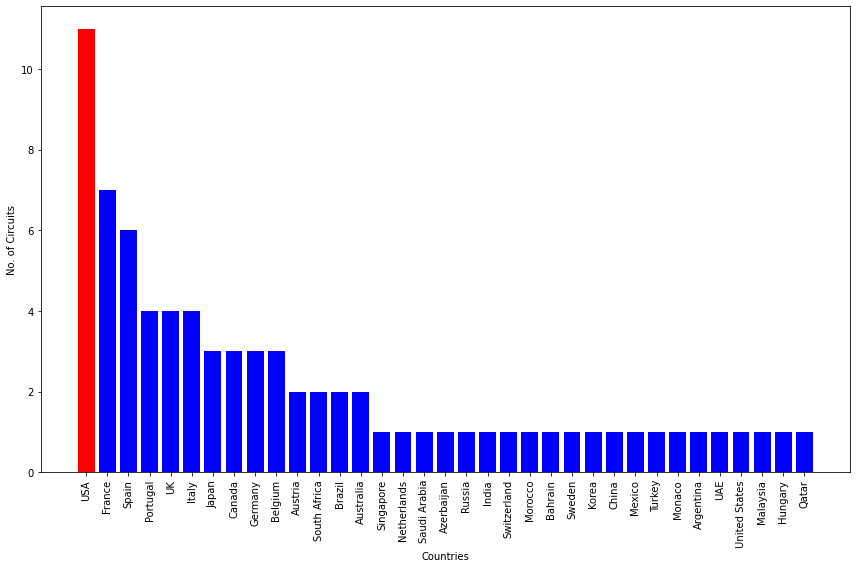

In [23]:
## Plot the number of circuits per country

fig, ax = plt.subplots(figsize=(12,8))

most_frequent_country = circuits['country'].value_counts().idxmax()

country_counts = circuits['country'].value_counts()
plt.bar(country_counts.index, country_counts.values, color='blue')

## Highlighting the most frequent country in the graph red
plt.bar(most_frequent_country, country_counts[most_frequent_country], 
        color='red')

plt.xlabel('Countries')
plt.ylabel('No. of Circuits')
plt.savefig('Circuits per country.png', dpi=300)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

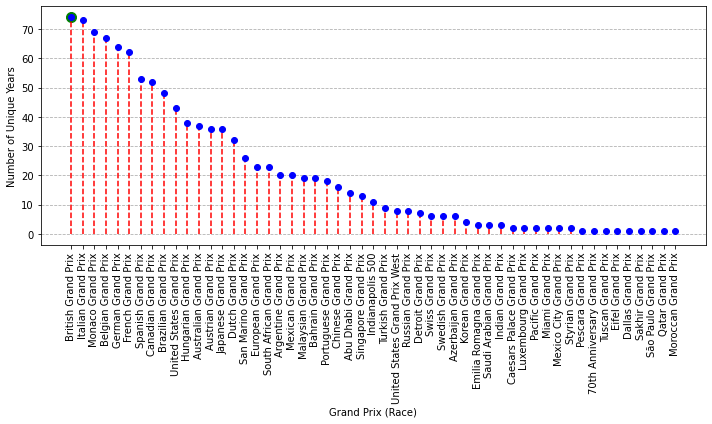

In [24]:
## Plotting a lollipop chart to represent the Grand Prix circuit with the most races held

## Must ensure no duplicate results are included for each driver competing
unique_races = driver_race_data.drop_duplicates(subset=['GP_name', 'year'])
race_counts = unique_races['GP_name'].value_counts()

race_counts = race_counts.sort_values(ascending=False)


winning_circuit = race_counts.index[0]

# Create a lollipop chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.stem(race_counts.index, race_counts.values, basefmt=' ', markerfmt='bo', 
         linefmt='r--', use_line_collection=True)

# Highlight the highest value with a red marker
plt.scatter(winning_circuit, race_counts[winning_circuit], color='green', 
            marker='o', s=100)

plt.xlabel('Grand Prix (Race)')
plt.ylabel('Number of Unique Years')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number of races held per Grand Prix - Lollipop Chart.png', dpi=300)
plt.show()

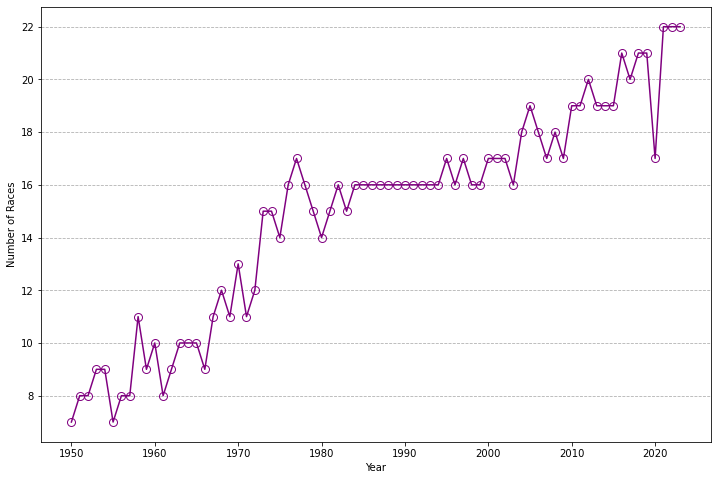

In [25]:
## Getting the number of races per year now with an empty markers line plot

races_per_year = races.groupby('year')['round'].nunique()

plt.figure(figsize=(12, 8))
plt.plot(races_per_year.index, races_per_year.values, marker='o', linestyle='-',
         markersize=8, markerfacecolor='none', color='purple')

plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid(axis='y', linestyle='--')
plt.savefig('Number of races per year.png', dpi=300)
plt.show()

In [26]:
# Creating race wins graph for last 20 years
race_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']!=0)]
race_wins_total = race_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

driver_wins = driver_race_data.loc[(driver_race_data['year']>=2002) & (driver_race_data['year']<2023) & (driver_race_data['finishing_position']==1)]
driver_wins_total = driver_wins.groupby(['driver'])['finishing_position'].count().sort_values(ascending=False)

perc_wins = pd.merge(race_wins_total,driver_wins_total, how='left', on='driver')
perc_wins = perc_wins.rename(columns={'finishing_position_x':'races','finishing_position_y':'wins'})
perc_wins['win_percent'] = ((perc_wins['wins'] / perc_wins['races']) * 100)
perc_wins = perc_wins[:15]      ## Only want to display the top 15 results
perc_wins = perc_wins.sort_values(ascending=False, by='win_percent')

## Converting index to list 
x_axis = perc_wins.index.tolist()
y_axis = perc_wins.groupby(['driver'], sort=False)['win_percent'].sum().sort_values(ascending=False)

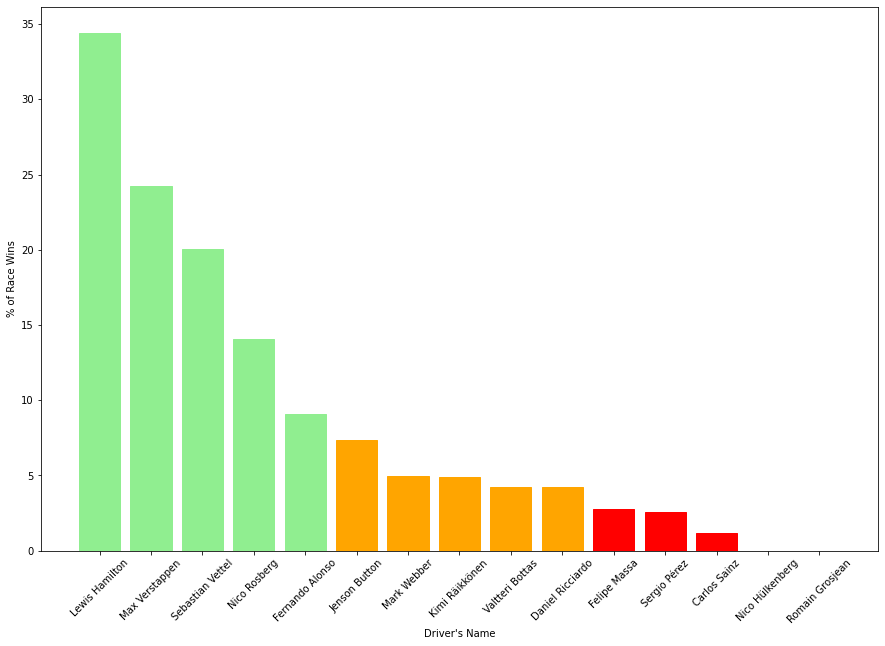

In [27]:
colors = ['lightgreen', 'orange', 'red']

plt.figure(figsize=(15,10))
top15 = plt.bar(x_axis, y_axis, color=colors[0])
color_index = 0    ## Starting with lightgreen

for i, bar in enumerate(top15):
    if i > 0 and i % 5 == 0:
        color_index += 1    ## Change color every 5 results
    bar.set_color(colors[color_index])

plt.xlabel("Driver's Name")
plt.ylabel("% of Race Wins")
plt.xticks(rotation=45);
plt.savefig('Percentage of Wins per Driver 2002-2022.png', dpi=300)

In [28]:
## Getting the driver age data based on DOB & Race date columns
driver_race_data[['dob','date']] = driver_race_data[['dob','date']].apply(pd.to_datetime)
driver_race_data['driver_age'] = (driver_race_data['date'] - driver_race_data['dob']) / np.timedelta64(1, 'Y')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/06/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/07/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/10/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/02/1979' in DD/MM/YYYY format. Provide format or specif

In [29]:
print(driver_race_data.dtypes)

resultId                           int64
raceId                             int64
driverId                           int64
constructorId                      int64
starting_position                  int64
finishing_position                 int64
points                           float64
laps                               int64
race_time_milliseconds             int64
fastestLapTime                     int64
fastestLapSpeed                   object
statusId                           int64
forename                          object
surname                           object
dob                       datetime64[ns]
driver_nationality                object
year                               int64
circuitId                          int64
GP_name                           object
date                      datetime64[ns]
country                           object
pitstop_milliseconds             float64
Q1_time                            int64
Q2_time                            int64
Q3_time         

In [30]:
## Checking float values from Driver Age
driver_race_data['driver_age'].head()

0    22.708201
1    30.445526
2    22.719152
3    26.631621
4    26.407113
Name: driver_age, dtype: float64

In [31]:
driver_race_data['driver_age'] = driver_race_data['driver_age'].astype(int)
driver_race_data['driver_age'].head()

0    22
1    30
2    22
3    26
4    26
Name: driver_age, dtype: int32

In [32]:
driver_race_data['finishing_position'].head(20)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: finishing_position, dtype: int64

In [33]:
## Plotting a histogram of driver wins from pole position
driver_pole_wins = pd.concat([driver_race_data['winner'], driver_race_data['starting_position'], driver_race_data['finishing_position']], axis=1)
driver_pole_wins.head(10)

,winner,starting_position,finishing_position
0,1,1,1
1,0,5,2
2,0,7,3
3,0,11,4
4,0,3,5
5,0,13,6
6,0,17,7
7,0,15,8
8,0,2,0
9,0,18,0


Correlation: 0.7187928513776533


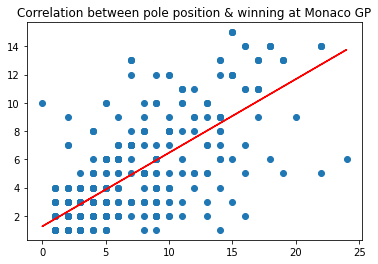

In [34]:
## Preparing a correlation between pole position and winning at Monaco

circuitsResults = pd.concat([merged_F1['circuitId'], merged_F1['grid'], merged_F1['positionOrder'], merged_F1['statusId']], axis=1)

x = circuitsResults[(circuitsResults.circuitId == 6) & (circuitsResults.statusId == 1)].grid
y = circuitsResults[(circuitsResults.circuitId == 6) & (circuitsResults.statusId == 1)].positionOrder

plt.scatter(x,y)

## Creating a regression line through stats.linregress and applying a red colour to it
## Correlation coefficient is calculated through r_value

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

plt.title('Correlation between pole position & winning at Monaco GP')
plt.savefig('Correlation pole position win - Monaco.png', dpi=300)

print("Correlation:", x.corr(y))

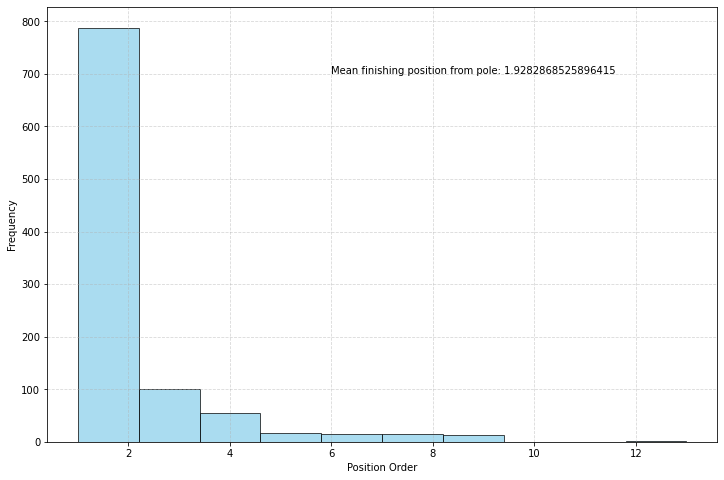

In [35]:
## Create graph to show the importance of pole poisition for all track winners

pole_position_adv = circuitsResults[(circuitsResults['grid'] == 1) & (circuitsResults['statusId'] == 1)]

y = pole_position_adv['positionOrder']

plt.figure(figsize=(12, 8))
plt.hist(y, bins=10, edgecolor='black', alpha=0.7, color='skyblue')

plt.xlabel('Position Order')
plt.ylabel('Frequency')

plt.grid(True, linestyle='--', alpha=0.5)
plt.text(6, 700, 'Mean finishing position from pole: 1.9282868525896415')
plt.savefig('Importance of starting from pole.png', dpi=300)
plt.show()

In [36]:
## Calculate the mean finishing position from the above
print("Mean finishing position from pole:", y.mean())

Mean finishing position from pole: 1.9282868525896415


In [37]:
## Joining results, races and pitstop datasets
results_races = pd.merge(results,races, right_on='raceId', left_on='raceId', how='left')
pitstop_races = pit_stops.groupby(['raceId','driverId']).agg({'stop':'sum', 'milliseconds':'sum'})
pitstop_races.reset_index()

,raceId,driverId,stop,milliseconds
0,841,1,3,46426
1,841,2,3,48092
2,841,3,1,23716
3,841,4,6,72165
4,841,5,1,24865
...,...,...,...,...
4907,1109,848,3,43838
4908,1109,852,3,47351
4909,1109,855,3,52064
4910,1109,857,3,43201


In [38]:
## Merging the pitstop results with result and races on driverId and raceId
results_races = (results_races.merge(pitstop_races, right_on=['raceId','driverId'], left_on=['raceId','driverId'], how='right'))
results_races.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds_x,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,stop,milliseconds_y
0,20780,841,1,1,3,2,2,2,2,18.0,58,+22.297,5392556,41,8,1:30.314,211.382,1,2011,1,1,Australian Grand Prix,27/03/2011,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,3,46426
1,20790,841,2,4,9,18,12,12,12,0.0,57,\N,\N,43,15,1:32.377,206.661,11,2011,1,1,Australian Grand Prix,27/03/2011,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,3,48092
2,20795,841,3,131,8,7,\N,R,17,0.0,22,\N,\N,21,17,1:33.503,204.173,4,2011,1,1,Australian Grand Prix,27/03/2011,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,1,23716
3,20782,841,4,6,5,5,4,4,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1,2011,1,1,Australian Grand Prix,27/03/2011,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,6,72165
4,20796,841,5,205,20,19,\N,R,18,0.0,19,\N,\N,19,20,1:34.918,201.129,47,2011,1,1,Australian Grand Prix,27/03/2011,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,1,24865


In [39]:
## Now grouping the results with the constructorId
pitstop_results = results_races.groupby(['constructorId', 'circuitId']).agg({'raceId': 'count', 'stop':'sum', 'milliseconds_y':'sum', 'points': 'sum'})
pitstop_results.reset_index(inplace=True)

## Merge these with the constructor dataframe
# Merge pitstop_prob_results with constructors_df  on constructorId.
pitstop_results_constructor = (pitstop_results.merge(constructors, right_on='constructorId', left_on='constructorId', how='left'))
pitstop_results_constructor.head()

,constructorId,circuitId,raceId,stop,milliseconds_y,points,constructorRef,name,nationality,url
0,1,1,20,64,9129995,143.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,1,2,14,83,1055353,63.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,1,3,22,125,3825323,85.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,1,4,26,106,1299617,80.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,1,5,6,24,305145,41.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [40]:
pitstop_results_constructor = pitstop_results_constructor.rename(columns={'milliseconds_y': 'milliseconds'})

In [41]:
## Now I want to get the stops, time, points used/gained per race based on pitstop data
pitstop_results_constructor['stopsPerRace'] = round(pitstop_results_constructor.stop/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor['timePerRace'] = round(pitstop_results_constructor.milliseconds/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor['pointsPerRace'] = round(pitstop_results_constructor.points/pitstop_results_constructor.raceId, 2)
pitstop_results_constructor.head(10)

,constructorId,circuitId,raceId,stop,milliseconds,points,constructorRef,name,nationality,url,stopsPerRace,timePerRace,pointsPerRace
0,1,1,20,64,9129995,143.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3.20,456499.75,7.15
1,1,2,14,83,1055353,63.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.93,75382.36,4.50
2,1,3,22,125,3825323,85.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.68,173878.32,3.86
3,1,4,26,106,1299617,80.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,4.08,49985.27,3.08
4,1,5,6,24,305145,41.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,4.00,50857.50,6.83
5,1,6,24,57,3278066,101.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,2.38,136586.08,4.21
6,1,7,19,64,879033,64.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3.37,46264.89,3.37
7,1,9,27,87,11630380,120.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,3.22,430754.81,4.44
8,1,10,10,51,539074,38.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.10,53907.40,3.80
9,1,11,26,116,2734388,158.0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,4.46,105168.77,6.08


In [42]:
pitstop_results_constructor = pitstop_results_constructor.drop(['constructorRef','nationality','url'], axis=1)
pitstop_results_constructor

,constructorId,circuitId,raceId,stop,milliseconds,points,name,stopsPerRace,timePerRace,pointsPerRace
0,1,1,20,64,9129995,143.0,McLaren,3.20,456499.75,7.15
1,1,2,14,83,1055353,63.0,McLaren,5.93,75382.36,4.50
2,1,3,22,125,3825323,85.0,McLaren,5.68,173878.32,3.86
3,1,4,26,106,1299617,80.0,McLaren,4.08,49985.27,3.08
4,1,5,6,24,305145,41.0,McLaren,4.00,50857.50,6.83
...,...,...,...,...,...,...,...,...,...,...
590,214,73,5,16,2175089,15.0,Alpine F1 Team,3.20,435017.80,3.00
591,214,75,2,12,140063,10.0,Alpine F1 Team,6.00,70031.50,5.00
592,214,77,6,17,4332759,26.0,Alpine F1 Team,2.83,722126.50,4.33
593,214,78,2,2,51508,25.0,Alpine F1 Team,1.00,25754.00,12.50


In [43]:
## Getting the data specifically for the Red Bull team
pitstop_constructor_rb = pitstop_results_constructor[(pitstop_results_constructor['constructorId']==9)]

In [44]:
## Now set the Red Bull correlation matrix
RB_corr = pitstop_constructor_rb.drop(columns=['constructorId', 'raceId']).corr()
RB_corr

,circuitId,stop,milliseconds,points,stopsPerRace,timePerRace,pointsPerRace
circuitId,1.000000,-0.564716,-0.309310,-0.518769,-0.027515,0.227443,0.271704
stop,-0.564716,1.000000,0.487157,0.782577,0.206054,-0.123264,-0.346536
milliseconds,-0.309310,0.487157,1.000000,0.415751,0.069687,0.291885,-0.321491
points,-0.518769,0.782577,0.415751,1.000000,-0.218190,-0.255461,-0.230022
stopsPerRace,-0.027515,0.206054,0.069687,-0.218190,1.000000,0.708226,0.012667
timePerRace,0.227443,-0.123264,0.291885,-0.255461,0.708226,1.000000,0.037990
pointsPerRace,0.271704,-0.346536,-0.321491,-0.230022,0.012667,0.037990,1.000000


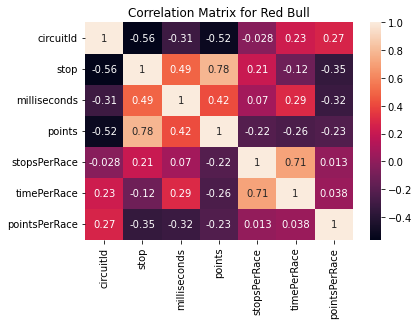

<Figure size 432x288 with 0 Axes>

In [45]:
## Generating heatmap of this correlation
sns.heatmap(RB_corr, annot=True)
plt.title('Correlation Matrix for Red Bull')
plt.show()
plt.savefig('Red Bull Correlation Matrix - Pitstops.png', dpi=300)

In [46]:
## Getting the number of accidents based on status

accidents_df = pd.DataFrame(merged_F1.groupby(['year','circuitRef'])['status'].value_counts()).rename(columns = {'status':'status_amount'}).reset_index()
accidents_df.head(5)

,year,circuitRef,status,status_amount
0,1950,bremgarten,+2 Laps,3
1,1950,bremgarten,+3 Laps,3
2,1950,bremgarten,Accident,2
3,1950,bremgarten,Engine,2
4,1950,bremgarten,Finished,2


In [47]:
## Getting the number of accidents and collisions per circuit per year

accidents_c = accidents_df[accidents_df['status'].isin(['Accident', 'Collision'])]
accidents_collisions = pd.DataFrame(accidents_c.groupby(['year','circuitRef'])['status'].value_counts()).rename(columns = {'status' : 'status_count'}).reset_index()
accidents_collisions.head()

,year,circuitRef,status,status_count
0,1950,bremgarten,Accident,1
1,1950,monaco,Accident,1
2,1950,monaco,Collision,1
3,1951,bremgarten,Accident,1
4,1951,indianapolis,Accident,1


C:\Users\Paul O' Mahony\AppData\Local\Temp\ipykernel_26512\1259238951.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


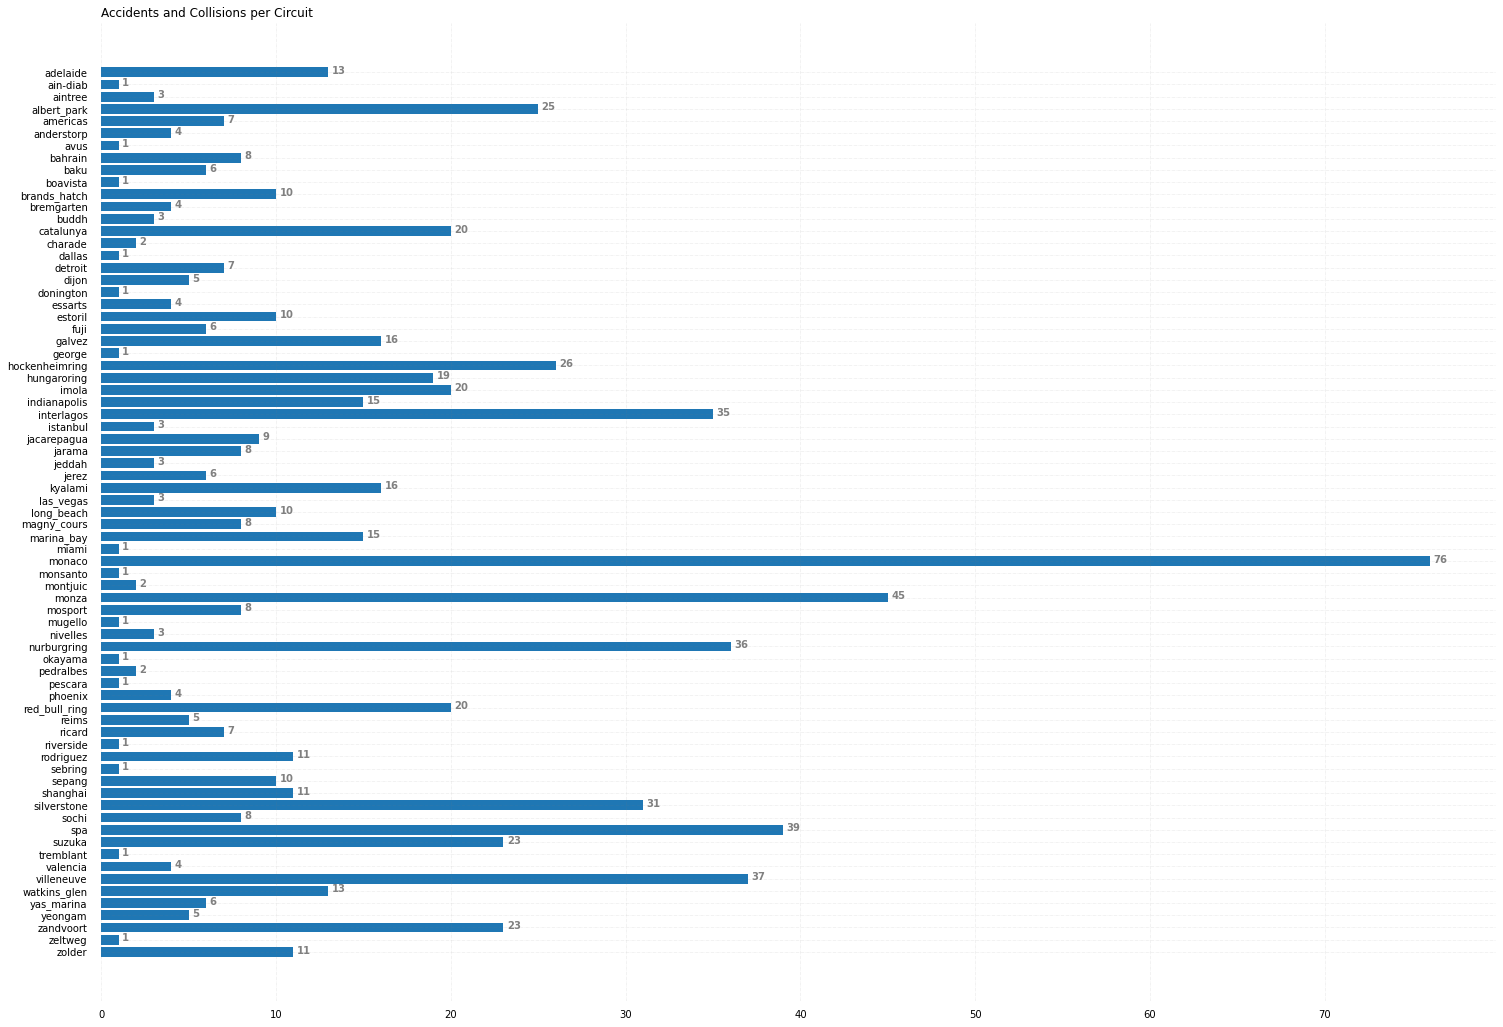

In [48]:
total_accidents_c = pd.DataFrame(accidents_collisions.groupby('circuitRef')['status_count'].sum()).reset_index()

trackName = total_accidents_c['circuitRef']
accidentCount = total_accidents_c['status_count']
 
fig, ax = plt.subplots(figsize =(25, 18))
 
## Creating a horizontal Bar Plot
ax.barh(trackName, accidentCount)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
## Display the top values
ax.invert_yaxis()
 
# Adding annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Accidents and Collisions per Circuit', loc ='left', )
plt.show()
ax.figure.savefig('Accidents and Collisions per Circuit.png', dpi=300)

In [49]:
## Getting the number of drivers who raced on circuit
## Changing circuitRef to driver_count as each circuitRef value accounts for one driver
total_driver_accident_c = pd.DataFrame(merged_F1['circuitRef'].value_counts()).reset_index().rename(columns = 
                                                        {'circuitRef' : 'driver_count', 'index': 'circuitRef'})

In [50]:
## Now the accidents per circuit rate of each
accident_circuit_rate = pd.merge(total_accidents_c, total_driver_accident_c, how = 'left', on = 'circuitRef')
accident_circuit_rate['accident_count'] = round(accident_circuit_rate['status_count'] / accident_circuit_rate['driver_count'], 
                                                2)
accident_circuit_rate.sort_values(by = 'accident_count', ascending = False, inplace = True)
accident_circuit_rate.head()

,circuitRef,status_count,driver_count,accident_count
21,fuji,6,91,0.07
6,avus,1,15,0.07
41,monsanto,1,16,0.06
50,pescara,1,16,0.06
35,las_vegas,3,60,0.05


In [51]:
## Getting the total accidents/collisions per year
accidents_collisions_years = pd.DataFrame(accidents_collisions.groupby('year')['status_count'].sum()).reset_index()
accidents_collisions_years.head(10)

,year,status_count
0,1950,3
1,1951,5
2,1952,3
3,1953,4
4,1954,7
5,1955,3
6,1956,7
7,1957,5
8,1958,8
9,1959,7


In [52]:
accidents_c.head()

,year,circuitRef,status,status_amount
2,1950,bremgarten,Accident,2
32,1950,monaco,Accident,10
39,1950,monaco,Collision,1
90,1951,bremgarten,Accident,3
109,1951,indianapolis,Accident,1


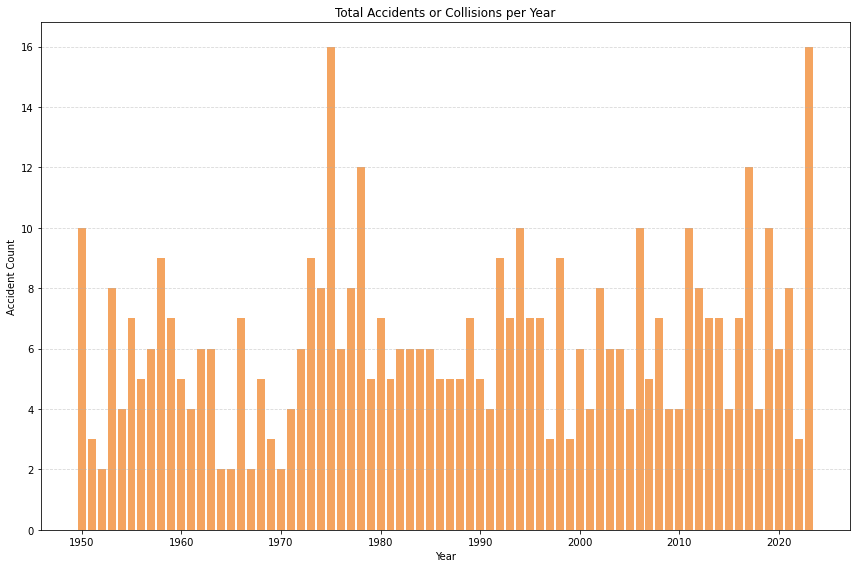

In [53]:
## Getting the total accident count per year

accident_c = accidents_c['status_amount']
year = accidents_c['year']

plt.figure(figsize=(12, 8))
plt.bar(year, accident_c, color='sandybrown')

plt.title('Total Accidents or Collisions per Year')
plt.xlabel('Year')
plt.ylabel('Accident Count') 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Accidents and Collisions per Year.png', dpi=300)
plt.show()

In [54]:
## Getting the accident rate per year based on the above dataframes
accident_count_years = pd.merge(accident_circuit_rate, accidents_c, how = 'left', on = 'circuitRef')
accident_count_years.sort_values(by = 'accident_count', ascending = False, inplace = True)
accident_count_years.head(15)

,circuitRef,status_count,driver_count,accident_count,year,status,status_amount
0,fuji,6,91,0.07,1976,Accident,1
4,fuji,6,91,0.07,2007,Accident,1
6,avus,1,15,0.07,1959,Accident,1
5,fuji,6,91,0.07,2008,Collision,1
1,fuji,6,91,0.07,1977,Collision,3
3,fuji,6,91,0.07,2007,Collision,4
2,fuji,6,91,0.07,1977,Accident,2
7,monsanto,1,16,0.06,1959,Accident,2
8,pescara,1,16,0.06,1957,Accident,2
19,long_beach,10,220,0.05,1979,Collision,1


In [55]:
accident_count_years.drop(['status_count', 'driver_count', 'status', 'status_amount'], axis=1)

,circuitRef,accident_count,year
0,fuji,0.07,1976
4,fuji,0.07,2007
6,avus,0.07,1959
5,fuji,0.07,2008
1,fuji,0.07,1977
...,...,...,...
781,ricard,0.01,1971
780,istanbul,0.01,2010
779,istanbul,0.01,2008
778,istanbul,0.01,2006


In [56]:
## Getting the total accidents/collisions per year
accidents_collisions_years = pd.DataFrame(accident_count_years.groupby('year')['accident_count'].sum()).reset_index()
accidents_collisions_years.head(10)

,year,accident_count
0,1950,0.12
1,1951,0.17
2,1952,0.10
3,1953,0.12
4,1954,0.23
5,1955,0.11
6,1956,0.21
7,1957,0.19
8,1958,0.24
9,1959,0.31


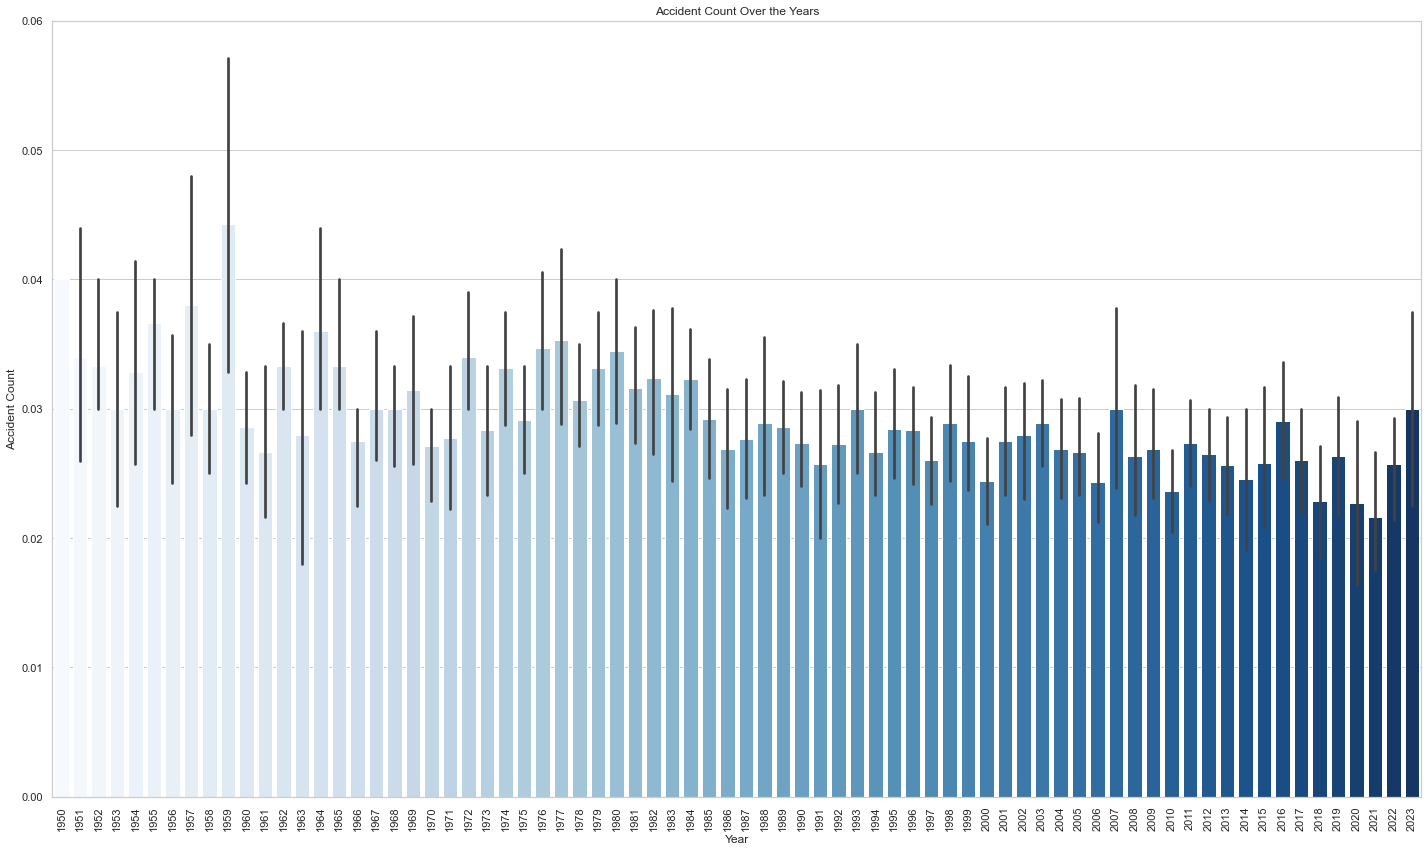

In [57]:
year = accident_count_years['year']
accident_count = accident_count_years['accident_count']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(20, 12))
sns.barplot(x=year, y=accident_count, palette="Blues")

# Customize the plot
plt.title('Accident Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.xticks(rotation=90)
plt.savefig('Accident Rate per Year.png', dpi=300)
plt.tight_layout()
plt.show()

In [58]:
## Want to generate a map of all circuits so confirming column names

circuits.head(5)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [59]:
import folium

coords = []

for lat,lng in zip(circuits['lat'],circuits['lng']):
    coords.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='OpenStreetMap')  
for i,j in zip(coords,circuits.name):
    marker = folium.Circle(
        location=i,
        radius=1000,
        popup="<strong>{0}</strong>".format(j))
    marker.add_to(maps)
maps

# Machine Learning

In [60]:
from sklearn.model_selection import train_test_split

## For missing data & data conversion
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

## For encoding using feature-engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import EqualWidthDiscretiser

from sklearn import metrics as sk_m

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
ML_data = pd.read_csv("Datasets/driver_race_data.csv")

In [62]:
ML_data = pd.merge(ML_data,constructors, how='left', on='constructorId')
ML_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,name,nationality,url
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0,0,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [64]:
ML_data.drop(['constructorRef','nationality','url'], axis=1)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,name
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1,McLaren
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1,BMW Sauber
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1,Williams
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0,0,Renault
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,16/03/2008,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,Kevin,Magnussen,1992-10-05,Danish,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,Haas F1 Team
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,Williams
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,Logan,Sargeant,2000-12-31,American,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,Williams
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,Esteban,Ocon,1996-09-17,French,2023,11,Hungarian Grand Prix,23/07/2023,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0,0,Alpine F1 Team


In [65]:
## Must update team names to most recent changes

ML_data['name'] = ML_data['name'].apply(lambda x: 'Aston Martin' if x=='Racing Point' else x)
ML_data['name'] = ML_data['name'].apply(lambda x: 'Aston Martin' if x=='Force India' else x)
ML_data['name'] = ML_data['name'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
ML_data['name'] = ML_data['name'].apply(lambda x: 'Alpine' if x=='Lotus F1' else x)
ML_data['name'] = ML_data['name'].apply(lambda x: 'Alpine' if x=='Renault' else x)
ML_data['name'] = ML_data['name'].apply(lambda x: 'AlphaTauri' if x=='Renault' else x)

In [66]:
ML_data.isnull().sum()

resultId                      0
raceId                        0
driverId                      0
constructorId                 0
starting_position             0
finishing_position            0
points                        0
laps                          0
race_time_milliseconds        0
fastestLapTime                0
fastestLapSpeed               0
statusId                      0
forename                      0
surname                       0
dob                           0
driver_nationality            0
year                          0
circuitId                     0
GP_name                       0
date                          0
country                       0
pitstop_milliseconds      21162
Q1_time                   16292
Q2_time                   16574
Q3_time                   16851
weather_warm                427
weather_cold                427
weather_dry                 427
weather_wet                 427
weather_cloudy              427
winner                        0
podium  

In [67]:
ML_data.rename(columns={'name':'constructorName'}, inplace=True)

In [68]:
ML_data.dtypes

resultId                    int64
raceId                      int64
driverId                    int64
constructorId               int64
starting_position           int64
finishing_position          int64
points                    float64
laps                        int64
race_time_milliseconds     object
fastestLapTime             object
fastestLapSpeed            object
statusId                    int64
forename                   object
surname                    object
dob                        object
driver_nationality         object
year                        int64
circuitId                   int64
GP_name                    object
date                       object
country                    object
pitstop_milliseconds      float64
Q1_time                    object
Q2_time                    object
Q3_time                    object
weather_warm              float64
weather_cold              float64
weather_dry               float64
weather_wet               float64
weather_cloudy

pitstop_milliseconds      0.672172
Q3_time                   0.535241
Q2_time                   0.526443
Q1_time                   0.517486
weather_dry               0.013563
weather_cold              0.013563
weather_cloudy            0.013563
weather_wet               0.013563
weather_warm              0.013563
country                   0.000000
resultId                  0.000000
raceId                    0.000000
winner                    0.000000
podium                    0.000000
constructorRef            0.000000
constructorName           0.000000
nationality               0.000000
date                      0.000000
GP_name                   0.000000
circuitId                 0.000000
race_time_milliseconds    0.000000
driverId                  0.000000
constructorId             0.000000
starting_position         0.000000
finishing_position        0.000000
points                    0.000000
laps                      0.000000
fastestLapTime            0.000000
year                

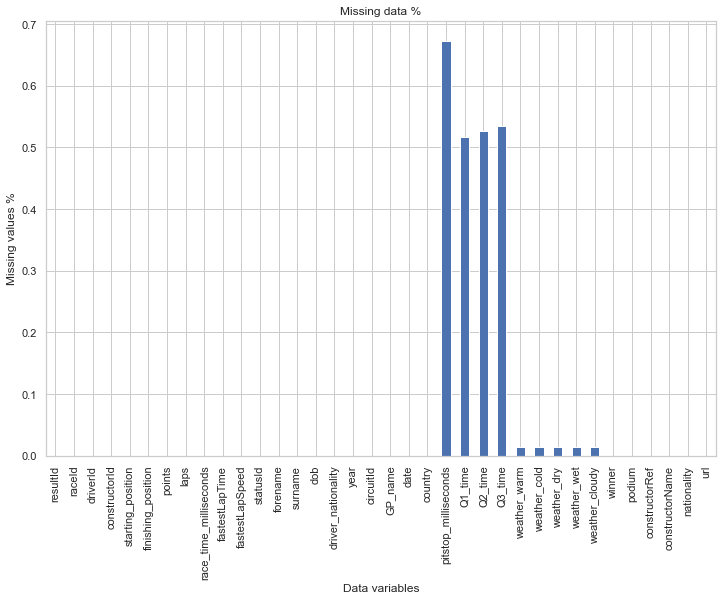

In [69]:
## Going to create a percentile graph of this missing data
print(ML_data.isnull().mean().sort_values(ascending=False))

ML_data.isnull().mean().plot.bar(figsize=(12,8))
plt.ylabel('Missing values %')
plt.xlabel('Data variables')
plt.title('Missing data %')
ax.figure.savefig('Percentage of missing data.png', dpi=300)

In [70]:
ML_data['driver'] = ML_data['forename']+' '+ML_data['surname']
ML_data['dob'] = pd.to_datetime(ML_data['dob'],format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

ML_data[['dob','date']] = ML_data[['dob','date']].apply(pd.to_datetime)
ML_data['driver_age'] = (ML_data['date'] - ML_data['dob']) / np.timedelta64(1, 'Y')
ML_data.drop(['forename','surname'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/06/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/07/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/10/1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/02/1979' in DD/MM/YYYY format. Provide format or specif

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,dob,driver_nationality,year,circuitId,GP_name,date,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,constructorName,nationality,url,driver,driver_age
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,1985-07-01,British,2008,1,Australian Grand Prix,2008-03-16,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Lewis Hamilton,22.708201
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,1977-10-05,German,2008,1,Australian Grand Prix,2008-03-16,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Nick Heidfeld,30.445526
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,1985-06-27,German,2008,1,Australian Grand Prix,2008-03-16,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Nico Rosberg,22.719152
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,1981-07-29,Spanish,2008,1,Australian Grand Prix,2008-03-16,Australia,NaN,1:26.907,1:26.188,\N,0.0,0.0,0.0,0.0,0.0,0,0,renault,Alpine,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Fernando Alonso,26.631621
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,1981-10-19,Finnish,2008,1,Australian Grand Prix,2008-03-16,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Heikki Kovalainen,26.407113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,\N,1:23.864,188.061,11,1992-05-10,Danish,2023,11,Hungarian Grand Prix,2023-07-23,Hungary,22152.0,1:19.206,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Kevin Magnussen,31.201188
31479,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,2000-12-31,American,2023,11,Hungarian Grand Prix,2023-07-23,Hungary,24001.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Logan Sargeant,22.557616
31480,26063,1109,858,3,20,0,0.0,67,\N,1:23.496,188.890,31,2000-12-31,American,2023,11,Hungarian Grand Prix,2023-07-23,Hungary,22197.0,1:19.248,\N,\N,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Logan Sargeant,22.557616
31481,26064,1109,839,214,12,0,0.0,2,\N,\N,\N,130,1996-09-17,French,2023,11,Hungarian Grand Prix,2023-07-23,Hungary,NaN,1:18.854,1:17.841,\N,NaN,NaN,NaN,NaN,NaN,0,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,Esteban Ocon,26.845178


In [71]:
## Dropping surplus columns
ML_data.drop(['dob', 'date'], axis=1, inplace=True)

## Replacing \N values
ML_data.replace(r'\N', np.nan, inplace=True)

In [72]:
ML_data.head(10)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,constructorName,nationality,url,driver,driver_age
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,British,2008,1,Australian Grand Prix,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Lewis Hamilton,22.708201
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,German,2008,1,Australian Grand Prix,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Nick Heidfeld,30.445526
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,German,2008,1,Australian Grand Prix,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Nico Rosberg,22.719152
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,Australia,NaN,1:26.907,1:26.188,NaN,0.0,0.0,0.0,0.0,0.0,0,0,renault,Alpine,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Fernando Alonso,26.631621
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Heikki Kovalainen,26.407113
5,6,18,6,3,13,6,3.0,57,NaN,1:29.639,212.974,11,Kazuki,Nakajima,Japanese,2008,1,Australian Grand Prix,Australia,NaN,1:26.891,1:26.413,NaN,0.0,0.0,0.0,0.0,0.0,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Kazuki Nakajima,22.371438
6,7,18,7,5,17,7,2.0,55,NaN,1:29.534,213.224,5,Sébastien,Bourdais,French,2008,1,Australian Grand Prix,Australia,NaN,1:27.446,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,Sébastien Bourdais,29.046455
7,8,18,8,6,15,8,1.0,53,NaN,1:27.903,217.180,5,Kimi,Räikkönen,Finnish,2008,1,Australian Grand Prix,Australia,NaN,1:26.140,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Kimi Räikkönen,28.413999
8,9,18,9,2,2,0,0.0,47,NaN,1:28.753,215.100,4,Robert,Kubica,Polish,2008,1,Australian Grand Prix,Australia,NaN,1:26.103,1:25.315,1:26.869,0.0,0.0,0.0,0.0,0.0,0,0,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Robert Kubica,23.677420
9,10,18,10,7,18,0,0.0,43,NaN,1:29.558,213.166,3,Timo,Glock,German,2008,1,Australian Grand Prix,Australia,NaN,1:26.919,1:26.164,1:29.593,0.0,0.0,0.0,0.0,0.0,0,0,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,Timo Glock,25.996427


In [73]:
## Converting driver_age to an integer/whole value

ML_data['driver_age'] = ML_data['driver_age'].astype(int)
ML_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,constructorName,nationality,url,driver,driver_age
0,1,18,1,1,1,1,10.0,58,5690616,1:27.452,218.300,1,Lewis,Hamilton,British,2008,1,Australian Grand Prix,Australia,NaN,1:26.572,1:25.187,1:26.714,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Lewis Hamilton,22
1,2,18,2,2,5,2,8.0,58,5696094,1:27.739,217.586,1,Nick,Heidfeld,German,2008,1,Australian Grand Prix,Australia,NaN,1:25.960,1:25.518,1:27.236,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Nick Heidfeld,30
2,3,18,3,3,7,3,6.0,58,5698779,1:28.090,216.719,1,Nico,Rosberg,German,2008,1,Australian Grand Prix,Australia,NaN,1:26.295,1:26.059,1:28.687,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Nico Rosberg,22
3,4,18,4,4,11,4,5.0,58,5707797,1:28.603,215.464,1,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,Australia,NaN,1:26.907,1:26.188,NaN,0.0,0.0,0.0,0.0,0.0,0,0,renault,Alpine,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Fernando Alonso,26
4,5,18,5,1,3,5,4.0,58,5708630,1:27.418,218.385,1,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,Australia,NaN,1:25.664,1:25.452,1:27.079,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Heikki Kovalainen,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,NaN,1:23.864,188.061,11,Kevin,Magnussen,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,1:19.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Kevin Magnussen,31
31479,26063,1109,858,3,20,0,0.0,67,NaN,1:23.496,188.890,31,Logan,Sargeant,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,1:19.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Logan Sargeant,22
31480,26063,1109,858,3,20,0,0.0,67,NaN,1:23.496,188.890,31,Logan,Sargeant,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,1:19.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Logan Sargeant,22
31481,26064,1109,839,214,12,0,0.0,2,NaN,NaN,NaN,130,Esteban,Ocon,French,2023,11,Hungarian Grand Prix,Hungary,NaN,1:18.854,1:17.841,NaN,NaN,NaN,NaN,NaN,NaN,0,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,Esteban Ocon,26


In [74]:
print(ML_data.dtypes)

resultId                    int64
raceId                      int64
driverId                    int64
constructorId               int64
starting_position           int64
finishing_position          int64
points                    float64
laps                        int64
race_time_milliseconds     object
fastestLapTime             object
fastestLapSpeed            object
statusId                    int64
forename                   object
surname                    object
driver_nationality         object
year                        int64
circuitId                   int64
GP_name                    object
country                    object
pitstop_milliseconds      float64
Q1_time                    object
Q2_time                    object
Q3_time                    object
weather_warm              float64
weather_cold              float64
weather_dry               float64
weather_wet               float64
weather_cloudy            float64
winner                      int64
podium        

In [75]:
## Need to convert the FastestLapTime, Q1, Q2 & Q3 columns to milliseconds
## If else statement checks for timestamp and integer values
## Returns none if value can not be converted

def convert_to_milliseconds(value):
    if isinstance(value, int):
        return value  
    try:
        components = value.split(':')
        minutes = float(components[0])
        seconds = float(components[1])
        if len(components) > 2:
            milliseconds = float(components[2])
        else:
            milliseconds = 0.0
        total_milliseconds = (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        return int(total_milliseconds)
    except (AttributeError, ValueError):
        return None  

columns_to_convert = ['fastestLapTime', 'Q1_time', 'Q2_time', 'Q3_time']

for column in columns_to_convert:
    ML_data[column] = ML_data[column].apply(convert_to_milliseconds)

print(ML_data)

       resultId  raceId  driverId  constructorId  starting_position  \
0             1      18         1              1                  1   
1             2      18         2              2                  5   
2             3      18         3              3                  7   
3             4      18         4              4                 11   
4             5      18         5              1                  3   
...         ...     ...       ...            ...                ...   
31478     26062    1109       825            210                 19   
31479     26063    1109       858              3                 20   
31480     26063    1109       858              3                 20   
31481     26064    1109       839            214                 12   
31482     26065    1109       842            214                 15   

       finishing_position  points  laps race_time_milliseconds  \
0                       1    10.0    58                5690616   
1              

In [76]:
## Convert these object columns to float while ignoring NaN values

ML_data['race_time_milliseconds'] = pd.to_numeric(ML_data['race_time_milliseconds'], errors='coerce')
ML_data['fastestLapTime'] = pd.to_numeric(ML_data['fastestLapTime'], errors='coerce')
ML_data['fastestLapSpeed'] = pd.to_numeric(ML_data['fastestLapSpeed'], errors='coerce')
ML_data['Q1_time'] = pd.to_numeric(ML_data['Q1_time'], errors='coerce')
ML_data['Q2_time'] = pd.to_numeric(ML_data['Q2_time'], errors='coerce')
ML_data['Q3_time'] = pd.to_numeric(ML_data['Q3_time'], errors='coerce')
ML_data

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,forename,surname,driver_nationality,year,circuitId,GP_name,country,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorRef,constructorName,nationality,url,driver,driver_age
0,1,18,1,1,1,1,10.0,58,5690616.0,87452.0,218.300,1,Lewis,Hamilton,British,2008,1,Australian Grand Prix,Australia,NaN,86572.0,85187.0,86714.0,0.0,0.0,0.0,0.0,0.0,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Lewis Hamilton,22
1,2,18,2,2,5,2,8.0,58,5696094.0,87739.0,217.586,1,Nick,Heidfeld,German,2008,1,Australian Grand Prix,Australia,NaN,85960.0,85518.0,87236.0,0.0,0.0,0.0,0.0,0.0,0,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,Nick Heidfeld,30
2,3,18,3,3,7,3,6.0,58,5698779.0,88090.0,216.719,1,Nico,Rosberg,German,2008,1,Australian Grand Prix,Australia,NaN,86295.0,86059.0,88687.0,0.0,0.0,0.0,0.0,0.0,0,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Nico Rosberg,22
3,4,18,4,4,11,4,5.0,58,5707797.0,88603.0,215.464,1,Fernando,Alonso,Spanish,2008,1,Australian Grand Prix,Australia,NaN,86907.0,86188.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,renault,Alpine,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Fernando Alonso,26
4,5,18,5,1,3,5,4.0,58,5708630.0,87418.0,218.385,1,Heikki,Kovalainen,Finnish,2008,1,Australian Grand Prix,Australia,NaN,85664.0,85452.0,87079.0,0.0,0.0,0.0,0.0,0.0,0,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Heikki Kovalainen,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,NaN,83864.0,188.061,11,Kevin,Magnussen,Danish,2023,11,Hungarian Grand Prix,Hungary,22152.0,79206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,Kevin Magnussen,31
31479,26063,1109,858,3,20,0,0.0,67,NaN,83496.0,188.890,31,Logan,Sargeant,American,2023,11,Hungarian Grand Prix,Hungary,24001.0,79248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Logan Sargeant,22
31480,26063,1109,858,3,20,0,0.0,67,NaN,83496.0,188.890,31,Logan,Sargeant,American,2023,11,Hungarian Grand Prix,Hungary,22197.0,79248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Logan Sargeant,22
31481,26064,1109,839,214,12,0,0.0,2,NaN,NaN,NaN,130,Esteban,Ocon,French,2023,11,Hungarian Grand Prix,Hungary,NaN,78854.0,77841.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team,Esteban Ocon,26


In [78]:
print(sorted(ML_data['year'].unique()))

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


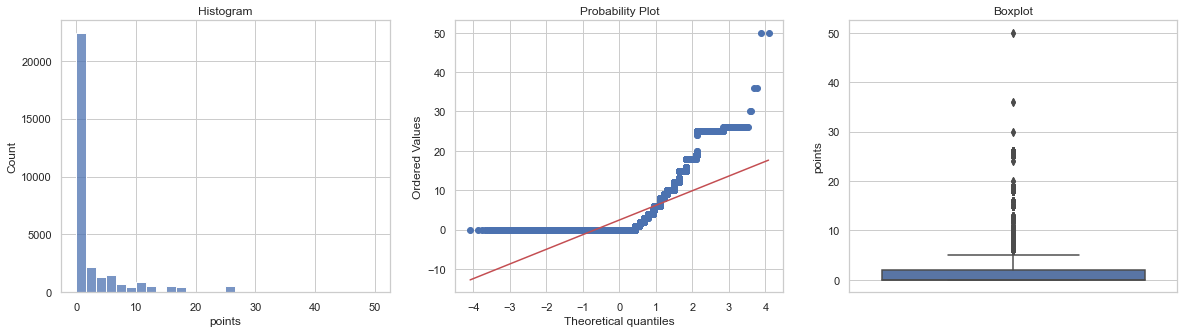

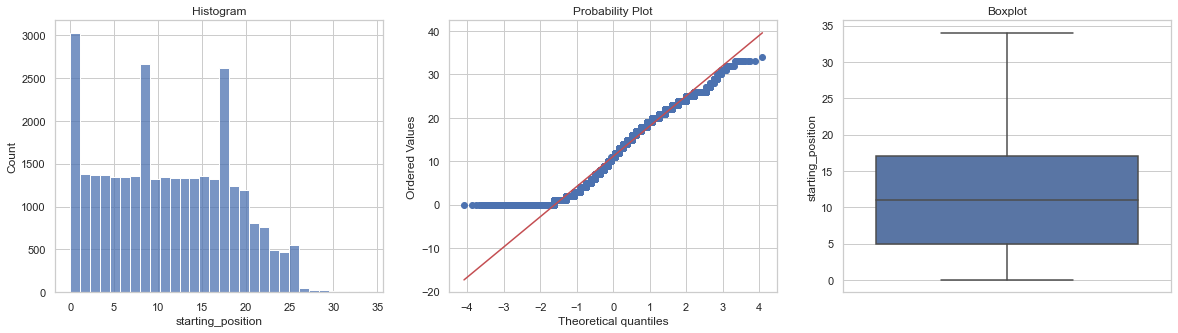

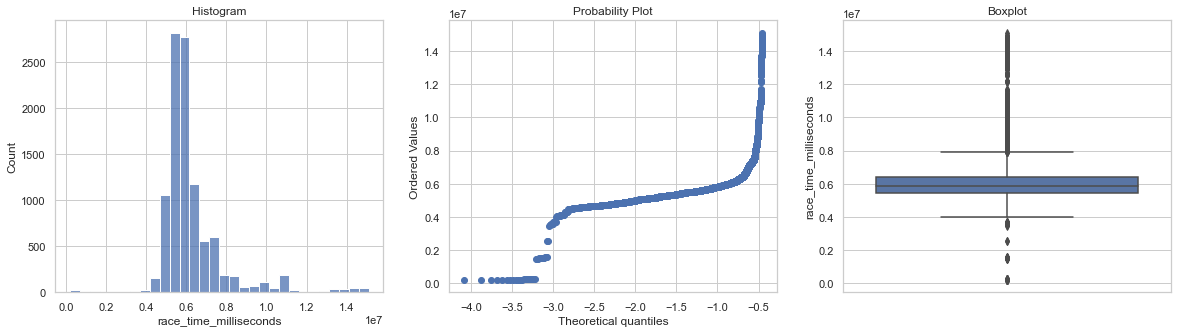

In [79]:
## Creating diagnostic plots (multiple linear regression - prediction errors vs prediction values)

def diagnostic_plots(ML_data, variable):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(ML_data[variable], bins=30)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=ML_data[variable])
    plt.title('Boxplot')

    plt.subplot(1, 3, 2)
    stats.probplot(ML_data[variable], dist="norm", plot=plt)
    plt.show()
    
diagnostic_plots(ML_data, 'points')
diagnostic_plots(ML_data, 'starting_position')
diagnostic_plots(ML_data, 'race_time_milliseconds')

In [82]:
ML_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31483 entries, 0 to 31482
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resultId                31483 non-null  int64  
 1   raceId                  31483 non-null  int64  
 2   driverId                31483 non-null  int64  
 3   constructorId           31483 non-null  int64  
 4   starting_position       31483 non-null  int64  
 5   finishing_position      31483 non-null  int64  
 6   points                  31483 non-null  float64
 7   laps                    31483 non-null  int64  
 8   race_time_milliseconds  10235 non-null  float64
 9   fastestLapTime          13006 non-null  float64
 10  fastestLapSpeed         13006 non-null  float64
 11  statusId                31483 non-null  int64  
 12  forename                31483 non-null  object 
 13  surname                 31483 non-null  object 
 14  driver_nationality      31483 non-null

In [83]:
ML_data.drop(['forename', 'surname', 'country', 'constructorRef', 'nationality', 'url'], axis=1)

,resultId,raceId,driverId,constructorId,starting_position,finishing_position,points,laps,race_time_milliseconds,fastestLapTime,fastestLapSpeed,statusId,driver_nationality,year,circuitId,GP_name,pitstop_milliseconds,Q1_time,Q2_time,Q3_time,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,winner,podium,constructorName,driver,driver_age
0,1,18,1,1,1,1,10.0,58,5690616.0,87452.0,218.300,1,British,2008,1,Australian Grand Prix,NaN,86572.0,85187.0,86714.0,0.0,0.0,0.0,0.0,0.0,1,1,McLaren,Lewis Hamilton,22
1,2,18,2,2,5,2,8.0,58,5696094.0,87739.0,217.586,1,German,2008,1,Australian Grand Prix,NaN,85960.0,85518.0,87236.0,0.0,0.0,0.0,0.0,0.0,0,1,BMW Sauber,Nick Heidfeld,30
2,3,18,3,3,7,3,6.0,58,5698779.0,88090.0,216.719,1,German,2008,1,Australian Grand Prix,NaN,86295.0,86059.0,88687.0,0.0,0.0,0.0,0.0,0.0,0,1,Williams,Nico Rosberg,22
3,4,18,4,4,11,4,5.0,58,5707797.0,88603.0,215.464,1,Spanish,2008,1,Australian Grand Prix,NaN,86907.0,86188.0,NaN,0.0,0.0,0.0,0.0,0.0,0,0,Alpine,Fernando Alonso,26
4,5,18,5,1,3,5,4.0,58,5708630.0,87418.0,218.385,1,Finnish,2008,1,Australian Grand Prix,NaN,85664.0,85452.0,87079.0,0.0,0.0,0.0,0.0,0.0,0,0,McLaren,Heikki Kovalainen,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31478,26062,1109,825,210,19,17,0.0,69,NaN,83864.0,188.061,11,Danish,2023,11,Hungarian Grand Prix,22152.0,79206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Haas F1 Team,Kevin Magnussen,31
31479,26063,1109,858,3,20,0,0.0,67,NaN,83496.0,188.890,31,American,2023,11,Hungarian Grand Prix,24001.0,79248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Williams,Logan Sargeant,22
31480,26063,1109,858,3,20,0,0.0,67,NaN,83496.0,188.890,31,American,2023,11,Hungarian Grand Prix,22197.0,79248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Williams,Logan Sargeant,22
31481,26064,1109,839,214,12,0,0.0,2,NaN,NaN,NaN,130,French,2023,11,Hungarian Grand Prix,NaN,78854.0,77841.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Alpine F1 Team,Esteban Ocon,26


In [85]:
## Reorder the columns now 

ML_data = ML_data[['raceId', 'circuitId', 'GP_name', 'year', 'driverId', 'driver_nationality', 'driver', 'driver_age', 
                   'constructorId', 'constructorName', 'Q1_time', 'Q2_time', 'Q3_time', 'starting_position', 'weather_warm', 
                   'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'race_time_milliseconds', 
                   'pitstop_milliseconds', 'finishing_position', 'laps', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 
                   'points', 'podium', 'winner', 'resultId']]

In [86]:
ML_data.head(20)

,raceId,circuitId,GP_name,year,driverId,driver_nationality,driver,driver_age,constructorId,constructorName,Q1_time,Q2_time,Q3_time,starting_position,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,race_time_milliseconds,pitstop_milliseconds,finishing_position,laps,fastestLapTime,fastestLapSpeed,statusId,points,podium,winner,resultId
0,18,1,Australian Grand Prix,2008,1,British,Lewis Hamilton,22,1,McLaren,86572.0,85187.0,86714.0,1,0.0,0.0,0.0,0.0,0.0,5690616.0,NaN,1,58,87452.0,218.300,1,10.0,1,1,1
1,18,1,Australian Grand Prix,2008,2,German,Nick Heidfeld,30,2,BMW Sauber,85960.0,85518.0,87236.0,5,0.0,0.0,0.0,0.0,0.0,5696094.0,NaN,2,58,87739.0,217.586,1,8.0,1,0,2
2,18,1,Australian Grand Prix,2008,3,German,Nico Rosberg,22,3,Williams,86295.0,86059.0,88687.0,7,0.0,0.0,0.0,0.0,0.0,5698779.0,NaN,3,58,88090.0,216.719,1,6.0,1,0,3
3,18,1,Australian Grand Prix,2008,4,Spanish,Fernando Alonso,26,4,Alpine,86907.0,86188.0,NaN,11,0.0,0.0,0.0,0.0,0.0,5707797.0,NaN,4,58,88603.0,215.464,1,5.0,0,0,4
4,18,1,Australian Grand Prix,2008,5,Finnish,Heikki Kovalainen,26,1,McLaren,85664.0,85452.0,87079.0,3,0.0,0.0,0.0,0.0,0.0,5708630.0,NaN,5,58,87418.0,218.385,1,4.0,0,0,5
5,18,1,Australian Grand Prix,2008,6,Japanese,Kazuki Nakajima,22,3,Williams,86891.0,86413.0,NaN,13,0.0,0.0,0.0,0.0,0.0,NaN,NaN,6,57,89639.0,212.974,11,3.0,0,0,6
6,18,1,Australian Grand Prix,2008,7,French,Sébastien Bourdais,29,5,Toro Rosso,87446.0,NaN,NaN,17,0.0,0.0,0.0,0.0,0.0,NaN,NaN,7,55,89534.0,213.224,5,2.0,0,0,7
7,18,1,Australian Grand Prix,2008,8,Finnish,Kimi Räikkönen,28,6,Ferrari,86140.0,NaN,NaN,15,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8,53,87903.0,217.180,5,1.0,0,0,8
8,18,1,Australian Grand Prix,2008,9,Polish,Robert Kubica,23,2,BMW Sauber,86103.0,85315.0,86869.0,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,47,88753.0,215.100,4,0.0,0,0,9
9,18,1,Australian Grand Prix,2008,10,German,Timo Glock,25,7,Toyota,86919.0,86164.0,89593.0,18,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,43,89558.0,213.166,3,0.0,0,0,10


In [ ]:
## Setting the testing and training sets with focus variable being points

X_train, X_test, y_train, y_test = train_test_split(driver_race_data.drop(['points'], axis=1), 
                                                    driver_race_data['points'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

In [ ]:
## Must address any missing values within the data

missing_col = [n for n in X_train.columns if driver_race_data[n].dtypes!='O']
X_train[missing_col].isnull().mean().sort_values()

#### No need to use ArbitraryNumberImputer to replace missing values with arbitrary ones

In [ ]:
## Doing the same now for categorical variables

category_features = [c for c in X_train.columns if driver_race_data[c].dtypes=='O']
X_train[category_features].isnull().mean().sort_values()

In [ ]:
## Applying standardization feature scaling - outliers in the data will not be affected

ML_F1_scaler = StandardScaler()

ML_F1_scaler.fit(X_train)

X_train_scaler = ML_F1_scaler.transform(X_train)
X_test_scaler = ML_F1_scaler.transform(X_test)

In [ ]:
X_train_scaler = pd.DataFrame(X_train_scaler)
X_test_scaler = pd.DataFrame(X_test_scaler)

In [ ]:
print(X_train_scaler.shape)
X_train_scaler.head(10)